## Week 4, Lab 1: Predicting Left-Handedness from Psychological Factors
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

We'll walk through a full data science problem in this lab. 

---
## Step 1: Define The Problem.

You're currently a data scientist working at a university. A professor of psychology is attempting to study the relationship between personalities and left-handedness. They have tasked you with gathering evidence so that they may publish.

Specifically, the professor says "I need to prove that left-handedness is caused by some personality trait. Go find that personality trait and the data to back it up."

As a data scientist, you know that any real data science problem must be **specific** and **conclusively answerable**. For example:
- Bad data science problem: "What is the link between obesity and blood pressure?"
    - This is vague and is not conclusively answerable. That is, two people might look at the conclusion and one may say "Sure, the problem has been answered!" and the other may say "The problem has not yet been answered."
- Good data science problem: "Does an association exist between obesity and blood pressure?"
    - This is more specific and is conclusively answerable. The problem specifically is asking for a "Yes" or "No" answer. Based on that, two independent people should both be able to say either "Yes, the problem has been answered" or "No, the problem has not yet been answered."
- Excellent data science problem: "As obesity increases, how does blood pressure change?"
    - This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

### 1. In the context of the left-handedness and personality example, what are three specific and conclusively answerable problems that you could answer using data science? 

> You might find it helpful to check out the codebook in the repo for some inspiration.

Answer: 
1. For each unique personality (specifically Q1), are people more or less likely to be left-handed?
2. Does left-handed people tend to have specific personalities?
3. Is there a difference in the score distribution of each question between left-handed people and non left-handed people?

---
## Step 2: Obtain the data.

### 2. Read in the file titled "data.csv."
> Hint: Despite being saved as a .csv file, you won't be able to simply `pd.read_csv()` this data!

In [1]:
import pandas as pd
df = pd.read_csv("data.csv", sep='\t')

### 3. Suppose that, instead of us giving you this data in a file, you were actually conducting a survey to gather this data yourself. From an ethics/privacy point of view, what are three things you might consider when attempting to gather this data?
> When working with sensitive data like sexual orientation or gender identity, we need to consider how this data could be used if it fell into the wrong hands!

Answer:
1. We should only collect what we need and not anything more.
2. Respondents should not be identified. Perhaps instead of collecting age as a single digit, it can be a range instead (i.e. 20-29 years old, 30-39, etc.) to reduce risk of reidentification.
3. For sensitive fields like gender, to provide a free text field for others.

---
## Step 3: Explore the data.

### 4. Conduct exploratory data analysis on this dataset.
> If you haven't already, be sure to check out the codebook in the repo, as that will help in your EDA process.

In [2]:
df.info()
# No missing values at all

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184 entries, 0 to 4183
Data columns (total 56 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Q1           4184 non-null   int64 
 1   Q2           4184 non-null   int64 
 2   Q3           4184 non-null   int64 
 3   Q4           4184 non-null   int64 
 4   Q5           4184 non-null   int64 
 5   Q6           4184 non-null   int64 
 6   Q7           4184 non-null   int64 
 7   Q8           4184 non-null   int64 
 8   Q9           4184 non-null   int64 
 9   Q10          4184 non-null   int64 
 10  Q11          4184 non-null   int64 
 11  Q12          4184 non-null   int64 
 12  Q13          4184 non-null   int64 
 13  Q14          4184 non-null   int64 
 14  Q15          4184 non-null   int64 
 15  Q16          4184 non-null   int64 
 16  Q17          4184 non-null   int64 
 17  Q18          4184 non-null   int64 
 18  Q19          4184 non-null   int64 
 19  Q20          4184 non-null 

In [3]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,...,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,...,NL,2,2,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,...,US,2,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,...,US,2,1,22,3,1,1,3,2,3


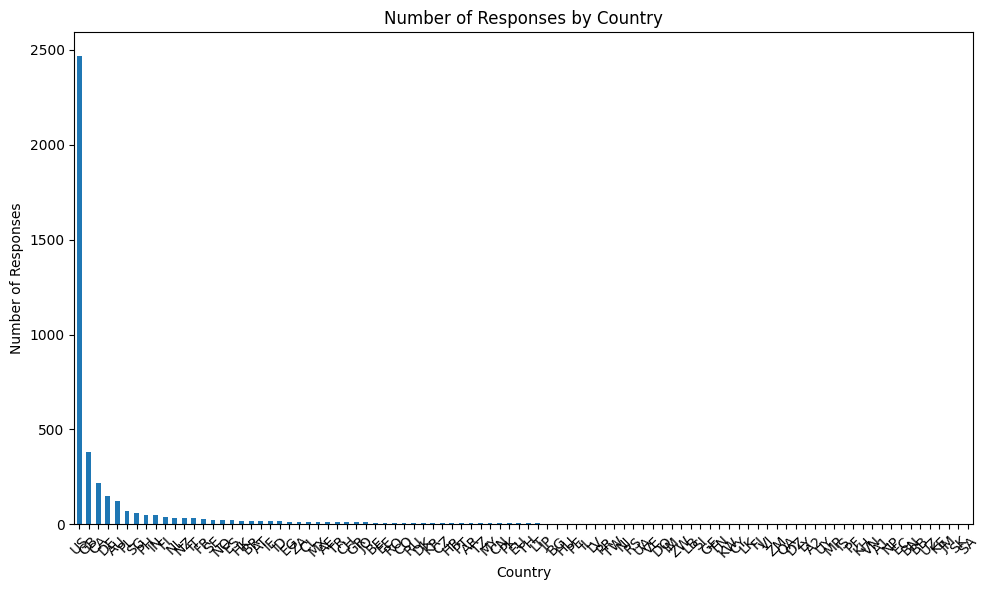

In [4]:
import matplotlib.pyplot as plt
# Counting the number of rows for each country
country_counts = df['country'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar')
plt.title('Number of Responses by Country')
plt.xlabel('Country')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Most are from the US

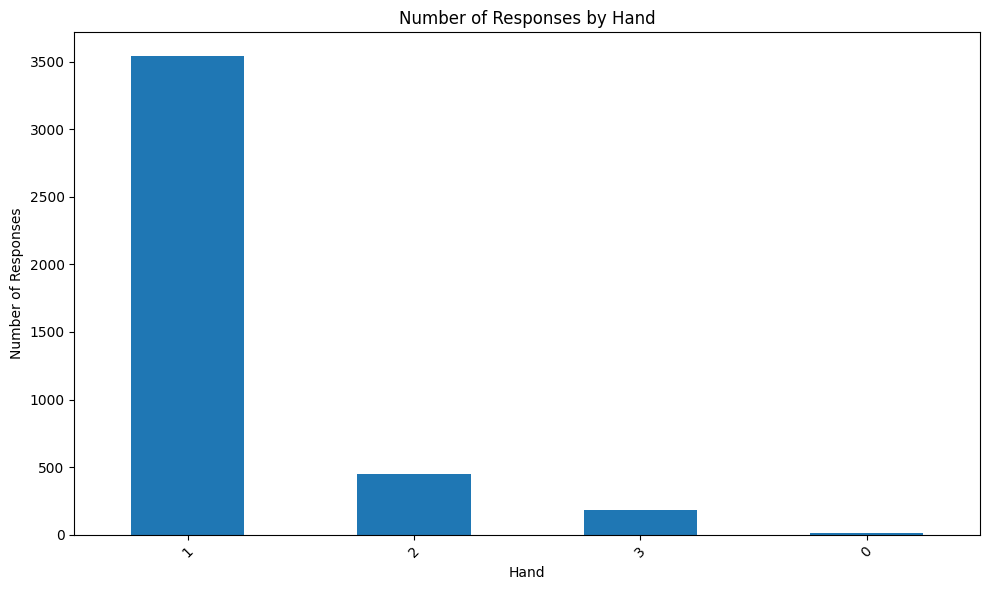

In [5]:
hand_counts = df['hand'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
hand_counts.plot(kind='bar')
plt.title('Number of Responses by Hand')
plt.xlabel('Hand')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 1=Right, 2=Left, 3=Both. Most responses are submitted by right handed people. Looking at the proportion, data is imbalanced.

---
## Step 4: Model the data.

### 5. Suppose I wanted to use Q1 - Q44 to predict whether or not the person is left-handed. Would this be a classification or regression problem? Why?

Answer: Classification problem. Output would be whether hand = 2 or hand != 2.

### 6. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed based on their responses to Q1 - Q44. Before doing that, however, you remember that it is often a good idea to standardize your variables. In general, why would we standardize our variables? Give an example of when we would standardize our variables.

Answer: Standardisation is applicable for algorithms that operate based on euclidean distance (KNN, SVM, Kmeans, etc.). This is because we want to ensure that our features are all on the same scale. In project 2 where we predict HDB resale prices, there are features like nearest distance to mall in metres and area in square feet. These 2 units are quite different and cannot be compared directly, especially if regularisation is to be used.

### 7. Give an example of when we might not standardize our variables.

Answer: If the variables are already on the same scale and we want to ensure that they are easy to interpret, we should not standardise them.

### 8. Based on your answers to 6 and 7, do you think we should standardize our predictor variables in this case? Why or why not?

Answer: No, especially if we are using question 1 to 44 only as these are all on the same scale (1 - 5). This will make them easy to interpret.

### 9. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed. What munging/cleaning do we need to do to our $y$ variable in order to explicitly answer this question? Do it.

Answer: For the hand column, map 2 to 1 and the rest of the values to 0.

In [6]:
df['hand'].value_counts()

1    3542
2     452
3     179
0      11
Name: hand, dtype: int64

In [7]:
df['hand'] = [1 if i == 2 else 0 for i in df['hand']]

In [8]:
df['hand'].value_counts()

0    3732
1     452
Name: hand, dtype: int64

### 10. The professor for whom you work suggests that you set $k = 4$. In this specific case, why might this be a bad idea?

Answer: Not ideal as it might lead to having ties during prediction. 

### 11. Let's *(finally)* use $k$-nearest neighbors to predict whether or not a person is left-handed!

> Be sure to create a train/test split with your data!

> Create four separate models, one with $k = 3$, one with $k = 5$, one with $k = 15$, and one with $k = 25$.

> Instantiate and fit your models.

In [9]:
df.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44', 'introelapse', 'testelapse', 'country',
       'fromgoogle', 'engnat', 'age', 'education', 'gender', 'orientation',
       'race', 'religion', 'hand'],
      dtype='object')

In [10]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X = df.drop(columns=['introelapse', 'testelapse', 'country',
       'fromgoogle', 'engnat', 'age', 'education', 'gender', 'orientation',
       'race', 'religion', 'hand'], axis=1)
y = df['hand']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

k3 = KNeighborsClassifier(n_neighbors=3)
k3.fit(X_train, y_train)
k5 = KNeighborsClassifier(n_neighbors=5)
k5.fit(X_train, y_train)
k15 = KNeighborsClassifier(n_neighbors=15)
k15.fit(X_train, y_train)
k25 = KNeighborsClassifier(n_neighbors=25)
k25.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

Being good data scientists, we know that we might not run just one type of model. We might run many different models and see which is best.

### 12. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, let's check the [documentation for logistic regression in sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Is there default regularization? If so, what is it? If not, how do you know?

Answer: Default is L2 regularisation.

### 13. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, should we standardize our features?

Answer:

### 14. Let's use logistic regression to predict whether or not the person is left-handed.


> Be sure to use the same train/test split with your data as with your $k$-NN model above!

> Create four separate models, one with LASSO and $\alpha = 1$, one with LASSO and $\alpha = 10$, one with Ridge and $\alpha = 1$, and one with Ridge and $\alpha = 10$. *(Hint: Be careful with how you specify $\alpha$ in your model!)*

> Instantiate and fit your models.

In [11]:
from sklearn.linear_model import LogisticRegression

# ‘liblinear’ is limited to one-versus-rest schemes. Let's use this solver instead as the default lbfgs only works for l2.
lasso1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')
lasso1.fit(X_train, y_train)
lasso10 = LogisticRegression(penalty='l1', C=0.1, solver='liblinear') # as C is inverse of regularisation strength
lasso10.fit(X_train, y_train)

ridge1 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
ridge1.fit(X_train, y_train)
ridge10 = LogisticRegression(penalty='l2', C=0.1, solver='liblinear')
ridge10.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

---
## Step 5: Evaluate the model(s).

### 15. Before calculating any score on your data, take a step back. Think about your $X$ variable and your $Y$ variable. Do you think your $X$ variables will do a good job of predicting your $Y$ variable? Why or why not? What impact do you think this will have on your scores?

Answer: No. The fact that someone is left-handed or not is not very likely to be linked to personality.

### 16. Using accuracy as your metric, evaluate all eight of your models on both the training and testing sets. Put your scores below. (If you want to be fancy and generate a table in Markdown, there's a [Markdown table generator site linked here](https://www.tablesgenerator.com/markdown_tables#).)
- Note: Your answers here might look a little weird. You didn't do anything wrong; that's to be expected!

Answer:

In [12]:
# KNN
print("KNN train with k=3: " + str(k3.score(X_train, y_train)))
print("KNN test with k=3: " + str(k3.score(X_test, y_test)))
print("KNN train with k=5: " + str(k5.score(X_train, y_train)))
print("KNN test with k=5: " + str(k5.score(X_test, y_test)))
print("KNN train with k=15: " + str(k15.score(X_train, y_train)))
print("KNN test with k=15: " + str(k15.score(X_test, y_test)))
print("KNN train with k=25: " + str(k25.score(X_train, y_train)))
print("KNN test with k=25: " + str(k25.score(X_test, y_test)))

KNN train with k=3: 0.9031230082855322
KNN test with k=3: 0.861376673040153
KNN train with k=5: 0.8932441045251752
KNN test with k=5: 0.884321223709369
KNN train with k=15: 0.8916507329509241
KNN test with k=15: 0.8919694072657743
KNN train with k=25: 0.8919694072657743
KNN test with k=25: 0.8919694072657743


In [13]:
# Logistic Regression
print("Logistic Regression train with lasso, alpha=1: " + str(lasso1.score(X_train, y_train)))
print("Logistic Regression test with lasso, alpha=1: " + str(lasso1.score(X_test, y_test)))
print("Logistic Regression train with lasso, alpha=10: " + str(lasso10.score(X_train, y_train)))
print("Logistic Regression test with lasso, alpha=10: " + str(lasso10.score(X_test, y_test)))
print("Logistic Regression train with ridge, alpha=1: " + str(ridge1.score(X_train, y_train)))
print("Logistic Regression test with ridge, alpha=1: " + str(ridge1.score(X_test, y_test)))
print("Logistic Regression train with ridge, alpha=10: " + str(ridge10.score(X_train, y_train)))
print("Logistic Regression test with ridge, alpha=10: " + str(ridge10.score(X_test, y_test)))

Logistic Regression train with lasso, alpha=1: 0.8922880815806246
Logistic Regression test with lasso, alpha=1: 0.8919694072657743
Logistic Regression train with lasso, alpha=10: 0.8922880815806246
Logistic Regression test with lasso, alpha=10: 0.8919694072657743
Logistic Regression train with ridge, alpha=1: 0.8922880815806246
Logistic Regression test with ridge, alpha=1: 0.8919694072657743
Logistic Regression train with ridge, alpha=10: 0.8922880815806246
Logistic Regression test with ridge, alpha=10: 0.8919694072657743


### 17. In which of your $k$-NN models is there evidence of overfitting? How do you know?

Answer: When k = 3 or 5, there is overfitting (train set score better than test set).

### 18. Broadly speaking, how does the value of $k$ in $k$-NN affect the bias-variance tradeoff? (i.e. As $k$ increases, how are bias and variance affected?)

Answer: As k increases, bias increases and variance decreases.

### 19. If you have a $k$-NN model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

Answer: Increase K to decrease variance. Pick another model. We can also try to check if there is multicollinearity for the questions.

### 20. In which of your logistic regression models is there evidence of overfitting? How do you know?

Answer: No evidence as train and test set scores are similar.

### 21. Broadly speaking, how does the value of $C$ in logistic regression affect the bias-variance tradeoff? (i.e. As $C$ increases, how are bias and variance affected?)

Answer: If C increases, regularisation strength decreases as C is the inverse of regularisation strength. Hence, variance increases and bias decreases.

### 22. For your logistic regression models, play around with the regularization hyperparameter, $C$. As you vary $C$, what happens to the fit and coefficients in the model? What do you think this means in the context of this specific problem?

Answer: Even if C varies, model scores is still the same. THis means that regularisation has very little to no effect.

### 23. If you have a logistic regression model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

Answer: Increase regularisation strength or trying using lasso that will reduce the coefficients to 0 (and hence performing feature selection). Can explore other models as well.

---
## Step 6: Answer the problem.

### 24. Suppose you want to understand which psychological features are most important in determining left-handedness. Would you rather use $k$-NN or logistic regression? Why?

Answer: Logistics regression because the coefficients are interpretable.

### 25. Select your logistic regression model that utilized LASSO regularization with $\alpha = 1$. Interpret the coefficient for `Q1`.

In [14]:
lasso1.coef_

array([[-0.03871061,  0.02146701,  0.04831754, -0.09394098,  0.05317974,
        -0.03337336,  0.01027203, -0.20914801, -0.0634498 ,  0.00412614,
        -0.01478534,  0.02547852, -0.02861665,  0.00639025, -0.02078827,
         0.0305913 ,  0.01778415, -0.04678015, -0.02768999, -0.02759518,
        -0.10580874, -0.05212732, -0.04698867,  0.00173885,  0.00506049,
         0.14393241,  0.03825034,  0.03703961,  0.0444556 ,  0.02302181,
        -0.00173263, -0.03948508,  0.00416196, -0.06017662,  0.02599196,
         0.01130372, -0.03126927,  0.08151387, -0.05218638, -0.07562321,
        -0.05327913, -0.07699404, -0.08481627, -0.02281663]])

Answer: Coefficient is -0.03890712. This means that as the value for Q1 increases by 1, the log-odds of being left-handed decreases by 0.0389.

### 26. If you have to select one model overall to be your *best* model, which model would you select? Why?
- Usually in the "real world," you'll fit many types of models but ultimately need to pick only one! (For example, a client may not understand what it means to have multiple models, or if you're using an algorithm to make a decision, it's probably pretty challenging to use two or more algorithms simultaneously.) It's not always an easy choice, but you'll have to make it soon enough. Pick a model and defend why you picked this model!

Answer: Either of the logistic regression models since performance are very similar. This is because the results from logistic regression are easily interpretable (as compared to KNN) and explained to business users.

### 27. Circle back to the three specific and conclusively answerable questions you came up with in Q1. Answer one of these for the professor based on the model you selected!

Answer: As value for Q1 increases by 1, log-odds of being left-handed decreases by 0.0389.

### BONUS:
Looking for more to do? Probably not - you're busy! But if you want to, consider exploring the following. (They could make for a blog post!)
- Create a visual plot comparing training and test metrics for various values of $k$ and various regularization schemes in logistic regression.
- Rather than just evaluating models based on accuracy, consider using sensitivity, specificity, etc.
- In the context of predicting left-handedness, why are unbalanced classes concerning? If you were to re-do this process given those concerns, what changes might you make?
- Fit and evaluate a generalized linear model other than logistic regression (e.g. Poisson regression).
- Suppose this data were in a `SQL` database named `data` and a table named `inventory`. What `SQL` query would return the count of people who were right-handed, left-handed, both, or missing with their class labels of 1, 2, 3, and 0, respectively? (You can assume you've already logged into the database.)